In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
x=df[['age','sex','children','smoker','region']].values
x

array([[19, 'female', 0, 'yes', 'southwest'],
       [18, 'male', 1, 'no', 'southeast'],
       [28, 'male', 3, 'no', 'southeast'],
       ...,
       [18, 'female', 0, 'no', 'southeast'],
       [21, 'female', 0, 'no', 'southwest'],
       [61, 'female', 0, 'yes', 'northwest']],
      shape=(1338, 5), dtype=object)

In [5]:
y=df[['bmi','charges']].values
y

array([[2.79000000e+01, 1.68849240e+04],
       [3.37700000e+01, 1.72555230e+03],
       [3.30000000e+01, 4.44946200e+03],
       ...,
       [3.68500000e+01, 1.62983350e+03],
       [2.58000000e+01, 2.00794500e+03],
       [2.90700000e+01, 2.91413603e+04]], shape=(1338, 2))

In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [7]:
label_encoder = LabelEncoder()

# Label encode columns 1 and 3
x[:, 1] = label_encoder.fit_transform(x[:, 1])
x[:, 3] = label_encoder.fit_transform(x[:, 3])

# One-hot encode column 4
onehot_encoder = OneHotEncoder()
column_4_encoded = onehot_encoder.fit_transform(x[:, 4].reshape(-1, 1)).toarray()

# Drop original column 4
x = np.delete(x, 4, axis=1)

# Concatenate one-hot encoded column 4 in the correct position
# x now has shape (n, original_cols - 1); insert column_4_encoded at index 4
x = np.concatenate([x[:, :4], column_4_encoded, x[:, 4:]], axis=1)

# Final output
x

array([[19, 0, 0, ..., 0.0, 0.0, 1.0],
       [18, 1, 1, ..., 0.0, 1.0, 0.0],
       [28, 1, 3, ..., 0.0, 1.0, 0.0],
       ...,
       [18, 0, 0, ..., 0.0, 1.0, 0.0],
       [21, 0, 0, ..., 0.0, 0.0, 1.0],
       [61, 0, 0, ..., 1.0, 0.0, 0.0]], shape=(1338, 8), dtype=object)

In [8]:
x_df=pd.DataFrame(x,columns=['age','sex','children','smoker','northeast','northwest','southeast','southwest','missing_column'])
y_df = pd.DataFrame(y, columns=['bmi_original', 'charges'])


final_df = pd.concat([x_df, y_df], axis=1)
df=final_df
df

ValueError: Shape of passed values is (1338, 8), indices imply (1338, 9)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

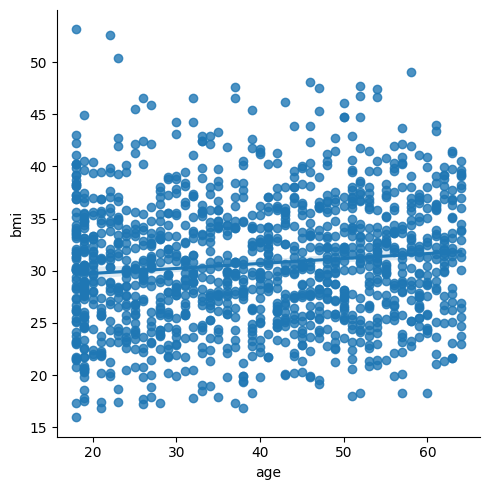

In [13]:
sns.lmplot(x='age',y='bmi',data=df)

In [22]:
reg = linear_model.LinearRegression()
reg.fit(df[['age', 'sex', 'children', 'smoker', 'region']], df[['bmi', 'charges']])  
#  we take [[]] as our df is 2d if our df is 1d we take []

KeyError: "None of [Index(['age', 'sex', 'children', 'smoker', 'region'], dtype='object')] are in the [columns]"